In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#Initializing the CNN 

model = Sequential()

In [3]:
#Adding Convolution layer
img_width, img_height = 64,64
model.add(Conv2D(32,(2,2),
                 input_shape=(img_width,img_height,3),
                 activation='relu'))

#32 = Using 32 filters
#3,3 = Kernel_size or filter size

In [4]:
model.add(MaxPooling2D(pool_size = (2,2)))

#pool_size = shape of pooling window

In [5]:
#Adding one more convolutional layer

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [6]:
#Flattening Layer

model.add(Flatten())

In [7]:
#Adding hidden layers 

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))


#Units = Numbber of nodes in the hidden layer

In [8]:
#Compiling the CNN
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [9]:
#Generating image data

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip=True)

test_datagen  = ImageDataGenerator(rescale=1./255)


In [10]:
#Fitting image to the CNN
#Defining data directory
train_data_dir = 'D:/DATASCIENCE/TshirtShirt/training'
validation_data_dir = 'D:/DATASCIENCE/TshirtShirt/Validation'

nb_train_samples =200
nb_validation_samples = 100
epochs = 50
batch_size = 5

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size=(64,64),
                                                batch_size = batch_size,
                                                class_mode = 'binary')


test_set = test_datagen.flow_from_directory(validation_data_dir,
                                           target_size=(64,64),
                                           batch_size=batch_size,
                                           class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [11]:
#Training and Evaluating the model


history = model.fit_generator( 
    training_set, 
    steps_per_epoch=nb_train_samples // batch_size, 
    epochs=epochs, 
    validation_data=test_set, 
    validation_steps=nb_validation_samples // batch_size) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
40/40 [==============================] - 2s 50ms/step - loss: 0.6706 - accuracy: 0.5750 - val_loss: 0.5721 - val_accuracy: 0.7100
Epoch 2/50
40/40 [==============================] - 2s 45ms/step - loss: 0.5024 - accuracy: 0.7950 - val_loss: 0.4228 - val_accuracy: 0.8500
Epoch 3/50
40/40 [==============================] - 2s 55ms/step - loss: 0.3629 - accuracy: 0.8750 - val_loss: 0.3523 - val_accuracy: 0.8800
Epoch 4/50
40/40 [==============================] - 2s 45ms/step - loss: 0.2445 - accuracy: 0.8950 - val_loss: 0.5438 - val_accuracy: 0.8100
Epoch 5/50
40/40 [==============================] - 2s 50ms/step - loss: 0.2150 - accuracy: 0.9350 - val_loss: 0.2061 - val_accuracy: 0.9500
Epoch 6/50
40/40 [==============================] - 2s 61ms/step - loss: 0.2156 - accuracy: 0.9400 - val_loss: 0.3221 - val_accuracy: 0.8700
Epoch 7/50
40/40 [==============================] - 2s 47ms/step - loss: 0.183

In [12]:
#Saving the model
model.save('tshirtandshirtcnn_model.h5')

In [13]:
#loading the model for testing
from keras.models import load_model 
classifier = load_model('tshirtandshirtcnn_model.h5')

In [14]:
from keras.preprocessing import image
import numpy as np

#Loading image from drive
test_image =image.load_img('D:/DATASCIENCE/TshirtShirt/manual_test/6.jpg',target_size =(64,64))

#Converting image to array
test_image =image.img_to_array(test_image)
test_image =np.expand_dims(test_image, axis =0)

#Predicting image
result = classifier.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'tshirt'
else:
    prediction = 'shirt'
print(prediction)

shirt


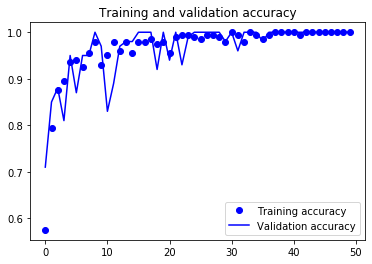

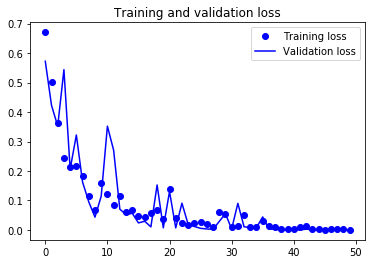

In [15]:

import matplotlib.pyplot as plt
%matplotlib inline

history4 = history
accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##### Conclusion


In this assignment, I've tried to classify two category images. 
Then I downloaded images from flipkart for two different categories by using web scrapping script. Then saved all images in a directory with two labels as tshirt and shirt. Then imported required libraries of keras and created model with two convolutional layers, a dense layer and also added dropout to avoid overfitting/underfitting, then compiled the model with test and train data and got the accuracy score of 0.9. After testing multiple images manually I found that model is predicting 8 out of 10 images correctly.